# Experiment 12 attention map visualization

In [1]:
import torch

from arithmetic_lm.model import TransformerDecoder
from arithmetic_lm.tokenizer import CharTokenizer
from arithmetic_lm.interp import plot_attn_maps
from arithmetic_lm.constants import PLOTS_DIR

import warnings

warnings.filterwarnings("ignore")

In [2]:
tokenizer = CharTokenizer()

In [3]:
def load_model(ckpt_path: str) -> tuple[torch.nn.Module, dict]:
    # load model
    ckpt = torch.load(ckpt_path, map_location="mps")
    model = TransformerDecoder(
        **ckpt["hyper_parameters"]["model_hparams"],
        # vocab_size=tokenizer.vocab_size,
    )
    # state dict has a prefix "model." in the key names
    model.load_state_dict({k[6:]: v for k, v in ckpt["state_dict"].items()})
    model.eval()
    return model, ckpt["hyper_parameters"]

In [4]:
# before and after phase transition
ckpt_path_before = "../checkpoints/addition-high-n-digit-variation/trans_dec_2layers_384embd_3head/step500000-train_loss1.9965-val_loss1.9776_backup.ckpt"
ckpt_path_after = "../checkpoints/addition-high-n-digit-variation/trans_dec_2layers_384embd_3head/step1054000-train_loss1.5561-val_loss1.5174.ckpt"

In [5]:
model_before, hparams = load_model(ckpt_path_before)
model_after, _ = load_model(ckpt_path_after)

In [6]:
reverse_ans = hparams["extra_hparams"]["data_format"]["reverse_ans"]
reverse_ans

False

In [7]:
module_names = [
    "transformer_encoder.layers[0].self_attn",
    "transformer_encoder.layers[1].self_attn",
]
figsize = (14, 8)

In [8]:
subdir = PLOTS_DIR / "exp_12"
subdir.mkdir(exist_ok=True)

prompt: '$12345+67890=' 5+5
true_ans: 80235
pred_answer: 80=8224$
transformer_encoder.layers[0].self_attn torch.Size([1, 3, 20, 20])
transformer_encoder.layers[1].self_attn torch.Size([1, 3, 20, 20])


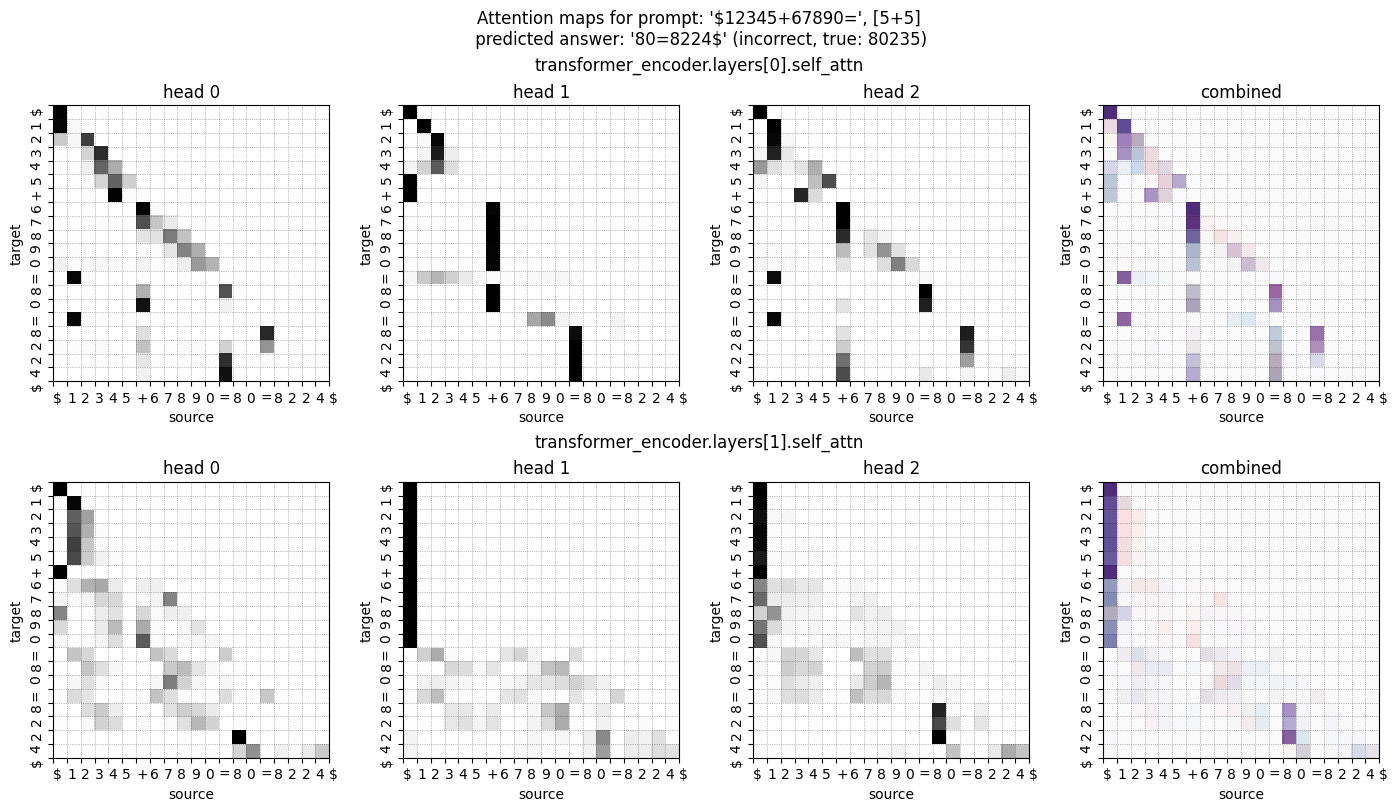

prompt: '$12345+67890=' 5+5
true_ans: 80235
pred_answer: 802124$
transformer_encoder.layers[0].self_attn torch.Size([1, 3, 19, 19])
transformer_encoder.layers[1].self_attn torch.Size([1, 3, 19, 19])


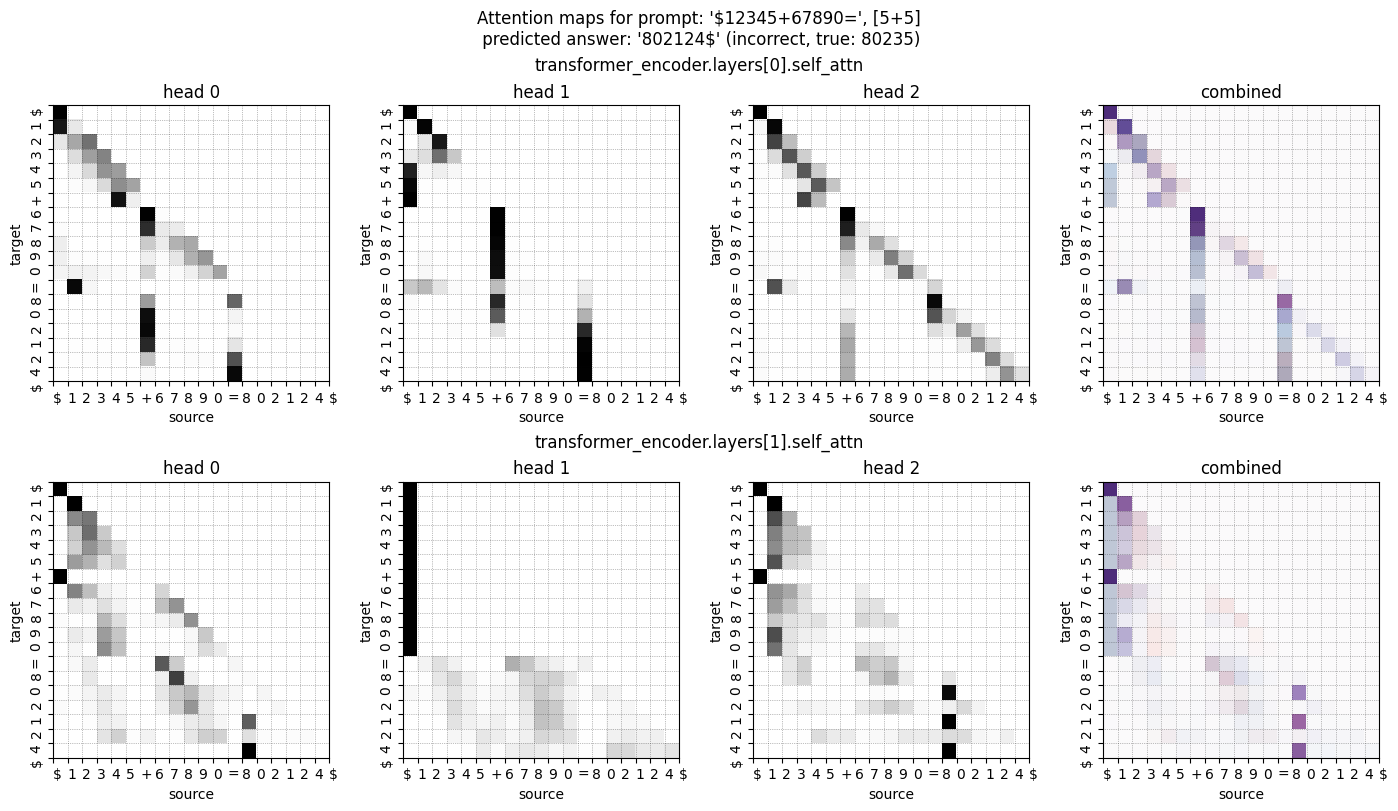

In [11]:
a, b = 12345, 67890
savepath = subdir / f"exp12_attention_maps_{a}+{b}.png"
kwargs = dict(
    tokenizer=tokenizer,
    a=a,
    b=b,
    module_names=module_names,
    figsize=figsize,
    reverse_ans=reverse_ans,
    # save=True,
)
plot_attn_maps(
    model=model_before,
    savepath=str(savepath).replace(".png", "_before.png"),
    **kwargs,
)
plot_attn_maps(
    model=model_after,
    savepath=str(savepath).replace(".png", "_after.png"),
    **kwargs,
)